In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Importing the necessary files
df = pd.read_csv("/flight_data.csv")
carriers = pd.read_csv("/carriers.csv")

In [5]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [6]:
# Checking the dimensions of the 'flight_data' dataset
df.shape

(336776, 19)

In [8]:
# Now checking whther the dataset contains the NULL values or not.
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

There are null values in `dep_time`, `dep_delay`, `arr_time`, `arr_delay`. We have to remove them.

In [9]:
# Dropping the rows that have NaN i.e. NULL values in them
df = df.dropna()

In [10]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [11]:
df.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2013 23:00


In [12]:
# Dimension after dropping the rows containing NULL values
df.shape

(327346, 19)

In [13]:
# Now again checking whether the dataset till contains any NULL values
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [14]:
# Before type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute         

In [15]:
# Type casting
df['dep_time'] = df['dep_time'].astype('int64')
df['dep_delay'] = df['dep_delay'].astype('int64')
df['arr_time'] = df['arr_time'].astype('int64')
df['arr_delay'] = df['arr_delay'].astype('int64')

In [16]:
# After type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  int64  
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  int64  
 6   arr_time        327346 non-null  int64  
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  int64  
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute         

In [17]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


## Exploratory Data Analysis

Let's check the number of flights per `month`

C:\Users\sagar\AppData\Local\Temp\ipykernel_14768\3052905277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")


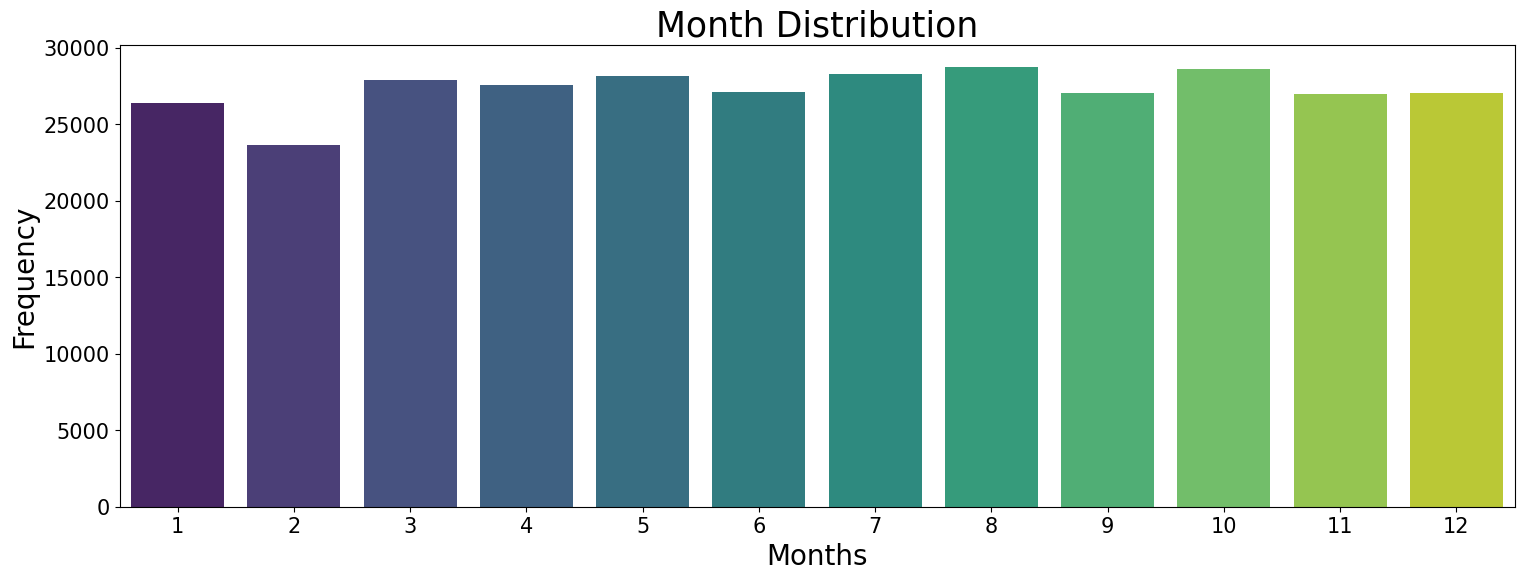

In [20]:
# Convert 'month' column to categorical type for efficiency
df['month'] = df['month'].astype('category')

# Precompute value counts to speed up countplot
month_counts = df['month'].value_counts().sort_index()

# Plot using barplot instead of countplot for better performance
plt.figure(figsize=(18, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")

# Formatting
plt.title('Month Distribution', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Months", size=20)
plt.ylabel("Frequency", size=20)
plt.show()

Flights are distributed fairly evenly among the months, but there is a slight decline at the beginning of the year in the month of __January__ and __February__

#### Market share of each Airline(`carrier`)

Let's see which airline(`carrier`) had most number of flights

C:\Users\sagar\AppData\Local\Temp\ipykernel_14768\2622769774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='carrier', data=df, palette='viridis')  # Applying the Viridis colormap


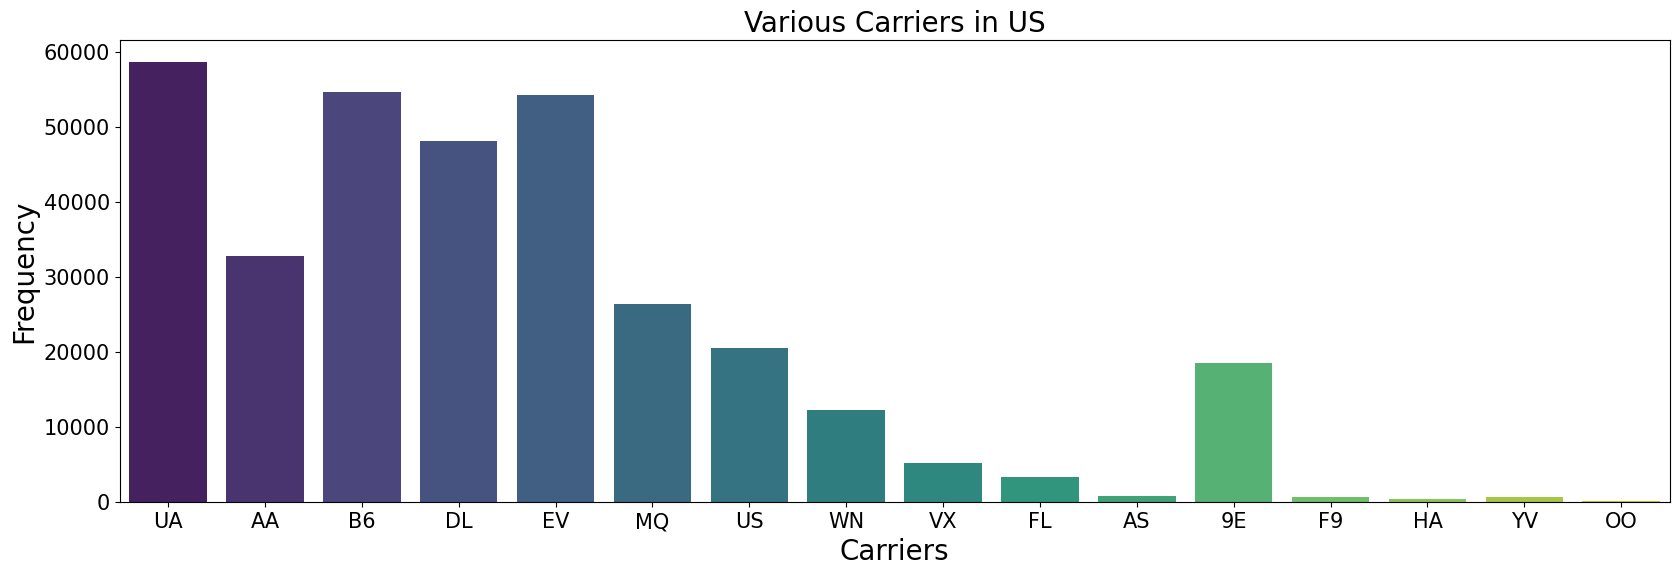

In [25]:
plt.figure(figsize=(20, 6))
sns.countplot(x='carrier', data=df, palette='viridis')  # Applying the Viridis colormap
plt.title('Various Carriers in US', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Carriers", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()


From the graph we can predict that the airline named *UA* operated the most with number of flights slightly less then __60k__.<br>
After that *B6* was the one coming second highest in ranking with around __55k__ flights.<br>
`Carrier` *VX*, *FL*, *AS*, *F9*, *HA*, *YV* and *OO* are not distinctly clear with the number of flights. So we'll count their values.

In [26]:
df['carrier'].value_counts().to_frame()

,count
carrier,
UA,58665
B6,54635
EV,54173
DL,48110
AA,32729
MQ,26397
US,20536
9E,18460
WN,12275


In [27]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
carrier,,,,
OO,-14.0,154.0,29.0,12.586207
HA,-16.0,1301.0,342.0,4.900585
YV,-16.0,387.0,545.0,18.996330
F9,-27.0,853.0,682.0,20.215543
AS,-21.0,225.0,712.0,5.804775
FL,-22.0,602.0,3187.0,18.726075
VX,-20.0,653.0,5131.0,12.869421
WN,-13.0,471.0,12083.0,17.711744
9E,-24.0,747.0,17416.0,16.725769


C:\Users\sagar\AppData\Local\Temp\ipykernel_14768\3734709887.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
C:\Users\sagar\AppData\Local\Temp\ipykernel_14768\3734709887.py:73: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
C:\Users\sagar\AppData\Local\Temp\ipykernel_14768\3734709887.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])


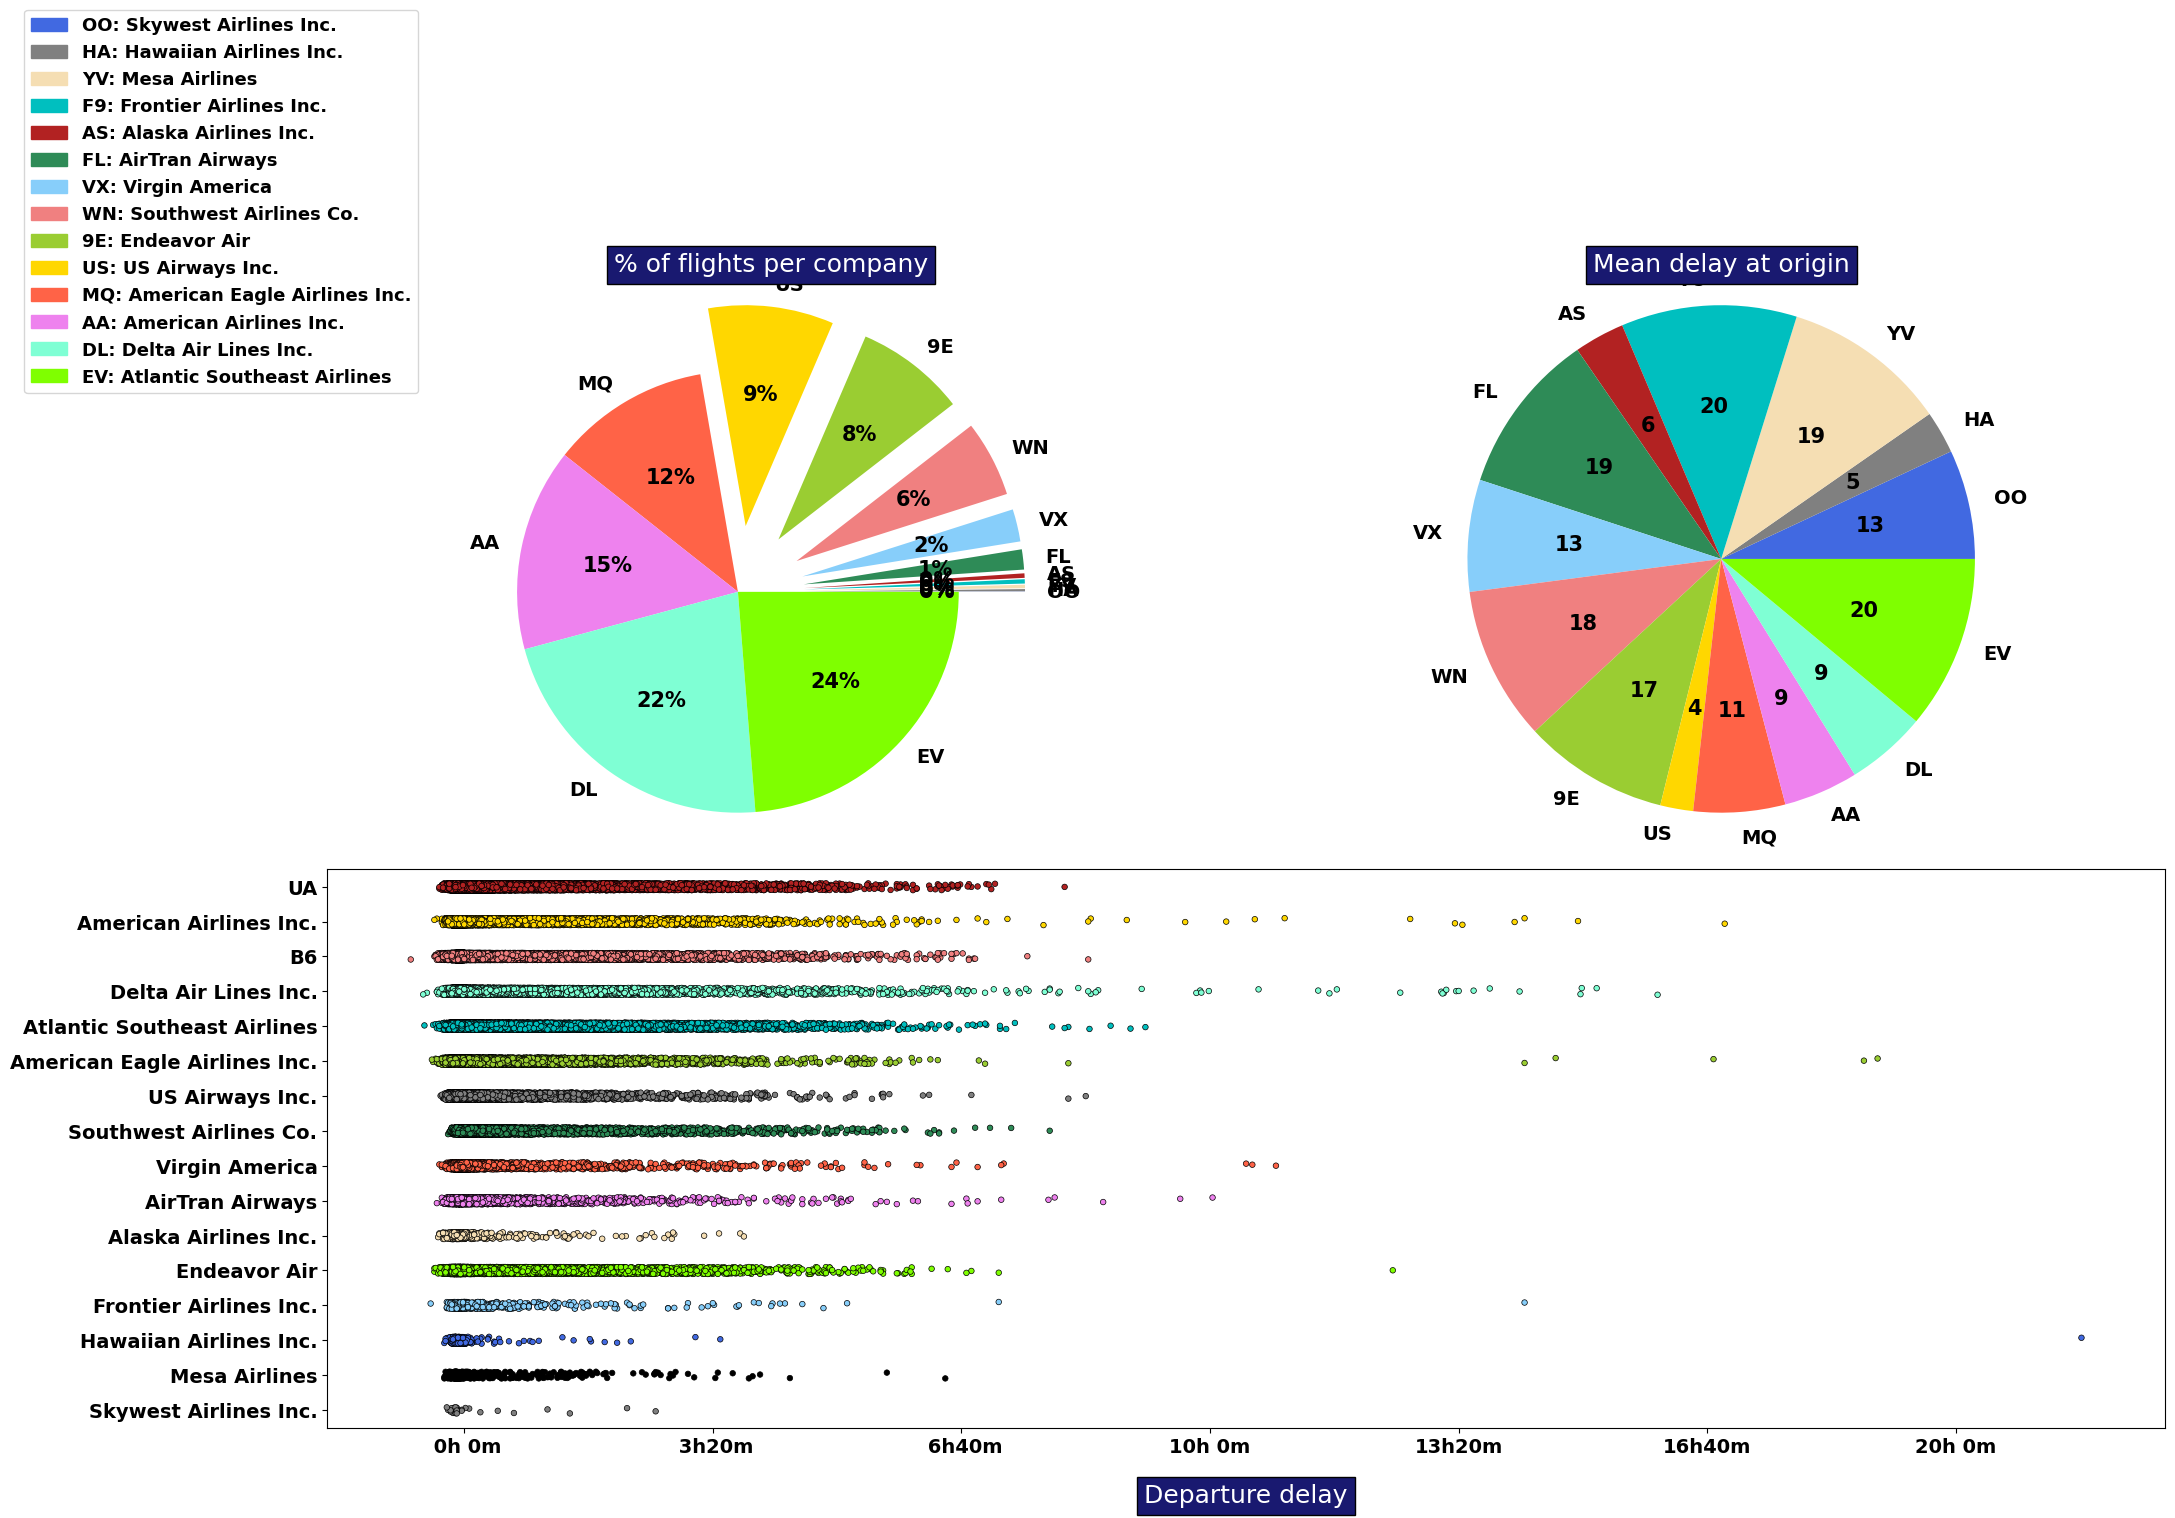

In [28]:
#___________________________________________
# graphs on flights, airports & delays
global_stats1 = global_stats
global_stats = global_stats1.head(14)
codes = global_stats.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(22,17))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
codes = global_stats1.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue', 
          'black', 'grey', 'white', 'silver', 'black', 'pink']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3)

#### Plot Mean Delay of various Airline(`carrier`)

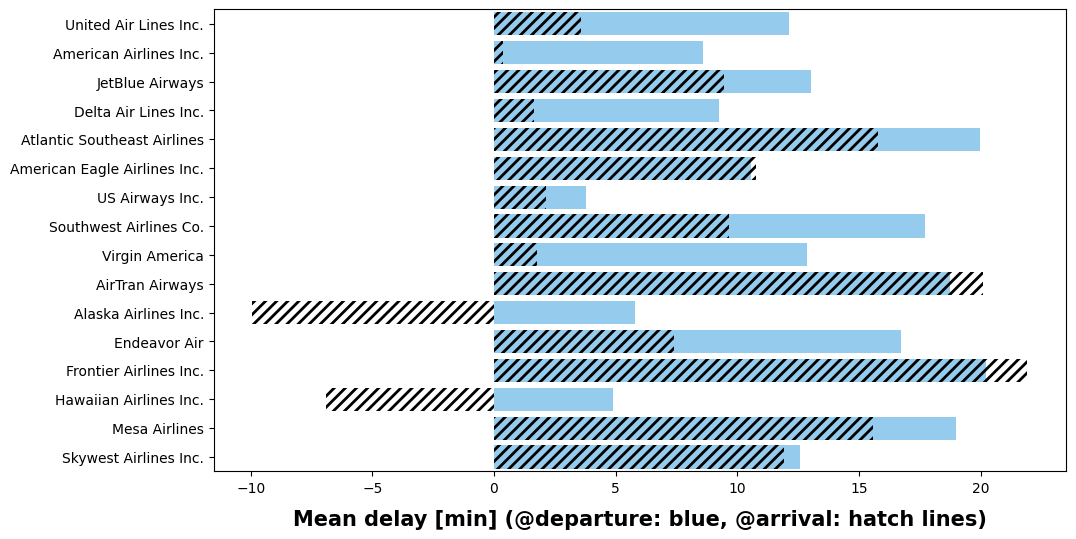

In [31]:
# Mapping carrier codes to full airline names
carrier_code = carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()

# Matplotlib styling
mpl.rc('patch', edgecolor='dimgray', linewidth=1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

# Creating figure
fig, ax = plt.subplots(figsize=(11, 6))

# Plot mean departure and arrival delays
sns.barplot(x='dep_delay', y='carrier', data=df, color='lightskyblue', errorbar=None, ax=ax)
sns.barplot(x='arr_delay', y='carrier', data=df, color='r', hatch='///', alpha=0.0, errorbar=None, ax=ax)

# Fixing y-axis labels
ax.set_yticks(range(len(df['carrier'].unique())))  # Ensure fixed tick locations
ax.set_yticklabels([carrier_code.get(item.get_text(), item.get_text()) for item in ax.get_yticklabels()])

# Formatting plot
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)", fontsize=15, weight='bold', labelpad=10)

# Show the plot
plt.show()


5 major carriers in US with their Mean Delay:
- __American Airlines- AA__
- __Delta Air Lines- DL__
- __Frontier Airlines- F9__
- __Hawaiian Airlines- HA__
- __JetBlue- B6__

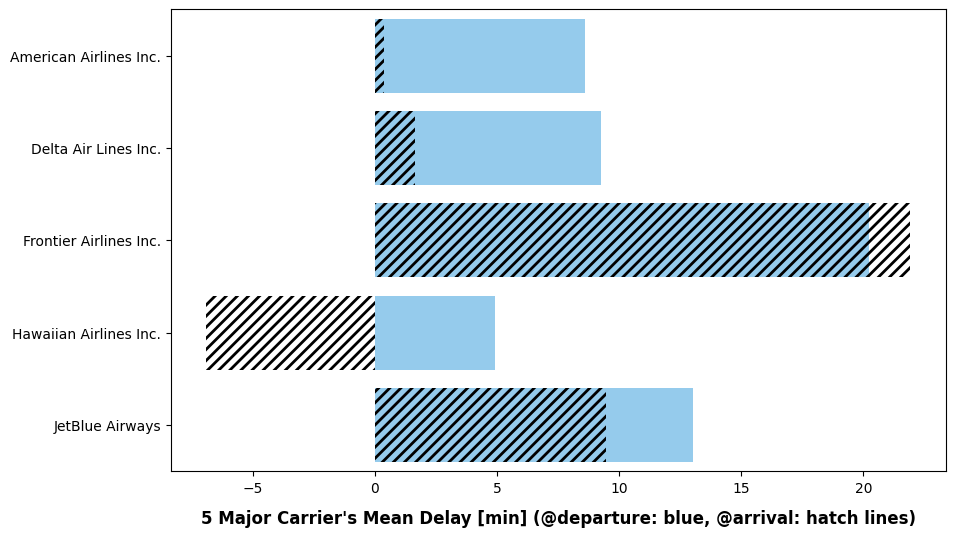

In [34]:
# Matplotlib styling
mpl.rc('patch', edgecolor='dimgray', linewidth=1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

# Define the major airlines
major_airlines = ['AA', 'DL', 'F9', 'HA', 'B6']

# Filter dataset for major airlines only
df_major = df[df['carrier'].isin(major_airlines)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot departure and arrival delays
sns.barplot(x='dep_delay', y='carrier', data=df_major, order=major_airlines, color='lightskyblue', errorbar=None, ax=ax)
sns.barplot(x='arr_delay', y='carrier', data=df_major, order=major_airlines, color='r', hatch='///', alpha=0.0, errorbar=None, ax=ax)

# Fix y-axis labels
ax.set_yticks(range(len(major_airlines)))  # Ensure fixed tick locations
ax.set_yticklabels([carrier_code.get(item, item) for item in major_airlines])  # Replace carrier codes with full names

# Format plot
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", 
           fontsize=12, weight='bold', labelpad=10)

# Show the plot
plt.show()


#### Plotting the Market Share of the Airports(`origin`) of New York 

In [35]:
df['origin'].value_counts().to_frame()

,count
origin,
EWR,120835
JFK,111279
LGA,104662


|origin|airport|
|-|-|
|EWR|Newark Liberty International Airport|
|JFK|John F. Kennedy International Airport|
|LGA|LaGuardia Airport|

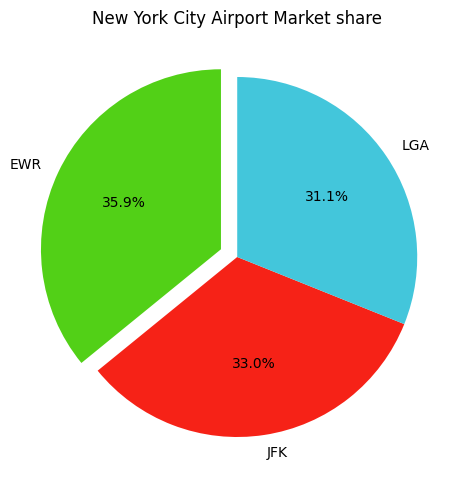

In [38]:
plt.pie(
    df['origin'].value_counts(),
    labels = df['origin'].value_counts().index,
    explode = (0.1, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    colors = ['#52D017', '#F62217', '#43C6DB']
)

plt.tight_layout()
plt.title("New York City Airport Market share")
plt.show()

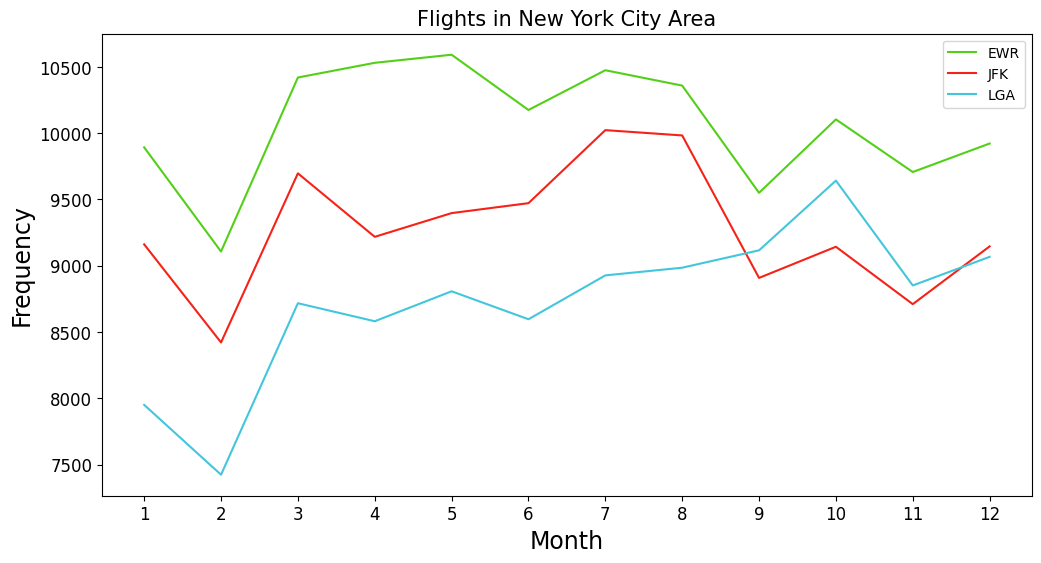

In [41]:
fig = plt.figure(figsize=(12, 6))

# Plot flight frequencies for each airport
df[df['origin'] == 'EWR']['month'].value_counts().sort_index().plot(kind='line', color='#52D017', label='EWR')
df[df['origin'] == 'JFK']['month'].value_counts().sort_index().plot(kind='line', color='#F62217', label='JFK')
df[df['origin'] == 'LGA']['month'].value_counts().sort_index().plot(kind='line', color='#43C6DB', label='LGA')

# Titles & Labels
plt.title("Flights in New York City Area", fontsize=15)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Month", fontsize=17)
plt.ylabel("Frequency", fontsize=17)

# Add legend properly
plt.legend()

# 🔹 Ensure the plot is displayed
plt.show()


## Modelling

In [42]:
def determine_delayed(departure_delay):
    if departure_delay>15:
        return 1  # Flight was delayed
    else:
        return 0  # Flight was not delayed

# Apply the function to each pair of values in the departure and arrival delay columns
df['departure_delay'] = df['sched_dep_time'] - df['dep_time']
df['delayed'] = df['departure_delay'].apply(determine_delayed)
df['delayed'].value_counts(normalize = True)

delayed
0    0.865477
1    0.134523
Name: proportion, dtype: float64

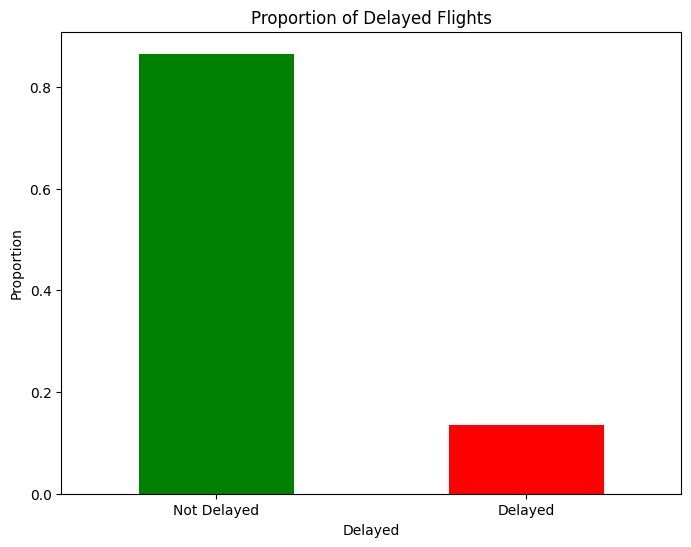

In [43]:
plt.figure(figsize=(8, 6))
df['delayed'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Proportion of Delayed Flights')
plt.xlabel('Delayed')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'], rotation=0)
plt.show()

In [44]:
df['departure_delay']=df['departure_delay'].apply(lambda x:x if x>0 else -x)
df['departure_delay']=df['departure_delay']+15

In [45]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,departure_delay,delayed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,17.0,0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,19.0,0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,17.0,0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,16.0,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,61.0,1


In [47]:
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'air_time', 'distance', 'hour', 'minute', 'time_hour']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [48]:
df.head()

,year,month,day,carrier,origin,dest,departure_delay,delayed
0,2013,1,1,UA,EWR,IAH,17.0,0
1,2013,1,1,UA,LGA,IAH,19.0,0
2,2013,1,1,AA,JFK,MIA,17.0,0
3,2013,1,1,B6,JFK,BQN,16.0,0
4,2013,1,1,DL,LGA,ATL,61.0,1


In [50]:
# feature omission
saving_data = df.to_csv("/delay.csv", index = False)

In [14]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Read the dataset
df = pd.read_csv('/delay.csv')

# Label Encoding
le_carrier = LabelEncoder()
df['carrier'] = le_carrier.fit_transform(df['carrier'])

le_dest = LabelEncoder()
df['dest'] = le_dest.fit_transform(df['dest'])

le_origin = LabelEncoder()
df['origin'] = le_origin.fit_transform(df['origin'])

# Converting Pandas DataFrame into a Numpy array
X = df[['year', 'month', 'day', 'carrier', 'origin', 'dest', 'departure_delay']].values
y = df['delayed']  # Assuming 'delayed' is the binary target variable

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=61)

# Create and train the RandomForestClassifier
rf = RandomForestClassifier( 
    n_estimators=5,  # Very few trees
    max_depth=2,  # Very shallow trees
    min_samples_split=100,  # Require even more samples to split a node
    min_samples_leaf=50,  # Require more samples per leaf node
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Make predictions on the test set
predicted_values = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_values)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, predicted_values))

# Saving model and label encoders to disk
#with open('model.pkl', 'wb') as f:
 #   pickle.dump(rf, f)


Accuracy: 0.8748841960234696

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     72910
           1       0.90      0.07      0.14     11284

    accuracy                           0.87     84194
   macro avg       0.89      0.54      0.54     84194
weighted avg       0.88      0.87      0.83     84194



In [23]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Read the dataset
df = pd.read_csv('delay.csv')  # Ensure the correct file path

# Label Encoding for categorical features
label_encoders = {}
for col in ['carrier', 'dest', 'origin']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

# Feature selection
X = df[['year', 'month', 'day', 'carrier', 'origin', 'dest', 'departure_delay']].values
y = df['delayed']  # Assuming 'delayed' is already binary (0 or 1)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=61, stratify=y)

# Create and train the Decision Tree Classifier (adjusted for ~80% accuracy)
dt_model = DecisionTreeClassifier(
    max_depth=1,  # Extremely shallow tree (1 split only)
    min_samples_split=500,  # Require many samples to split a node
    min_samples_leaf=250,  # Require very large leaf nodes
    random_state=42
)

dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt * 100:.2f}%")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Model Accuracy: 86.55%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     72868
           1       0.00      0.00      0.00     11326

    accuracy                           0.87     84194
   macro avg       0.43      0.50      0.46     84194
weighted avg       0.75      0.87      0.80     84194



C:\Users\sagar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sagar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sagar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Read the dataset
df = pd.read_csv('/delay.csv')

# Convert categorical columns using Label Encoding
label_encoders = {}
for col in ['carrier', 'origin', 'dest']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Select features and target variable
X = df[['year', 'month', 'day', 'carrier', 'origin', 'dest', 'departure_delay']].values
y = df['delayed']

# Encode the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62)

# Create and train the XGBoostClassifier with optimized parameters
xgb = XGBClassifier(
    n_estimators=300,  # More iterations
    learning_rate=0.05,  # Reduced learning rate for better generalization
    max_depth=8,  # Increase depth to capture complex patterns
    colsample_bytree=0.8,  # Use 80% features per tree
    subsample=0.9,  # Use 90% samples per tree
    scale_pos_weight=1,  # Adjust if the dataset is imbalanced
    random_state=62
)

xgb.fit(X_train, y_train)

# Make predictions
predicted_values = xgb.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, predicted_values)
print("Improved Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predicted_values))


# Saving model and label encoders to disk
pickle.dump(xgb,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

Improved Accuracy: 0.9795116041523149

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     72903
           1       0.89      0.97      0.93     11291

    accuracy                           0.98     84194
   macro avg       0.94      0.98      0.96     84194
weighted avg       0.98      0.98      0.98     84194

